In [27]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import scipy

def functs4(snr):
    
    print("Señal SNR = ", snr)

    #%% Variables   

    fs = 1000
    N = 1000    

    SNR = snr #db    

    n_pruebas = 200 

    omega0 = fs/4 #mitad de banda   

    a1 = np.sqrt(2) 

    pot_ruido_analog = 10**(-SNR/10)    

    ver = -10 * np.log(pot_ruido_analog)    

    #%% Señal   

    ts=1/fs
    df=fs/N
        
    ## Tiempo ##    

    tt = np.linspace(0, (N-1)*ts, N).reshape((N,1))
    tt = np.tile(tt, n_pruebas) 

    fr = np.random.uniform(-1/2, 1/2, size = (1,n_pruebas)) 

    omega1 = omega0 + fr*(df)   

    ## Argumento ## 

    arg = (omega1 * tt) 

    xx = a1*np.sin(2*np.pi*omega1*tt)   

    #%% Normalizo   

    xn = xx/np.std(xx)  

    nn =  np.random.normal(0, np.sqrt(pot_ruido_analog), (N,n_pruebas)) # señal de ruido de analógico    

    analog_sig = xn # señal analógica sin ruido 

    sr = analog_sig + nn # señal analógica de entrada al ADC (con ruido analógico)  

    #plt.figure(2)
    ft_As = 1/N * np.fft.fft(sr, axis=0)
    ff = np.linspace(0, (N-1)*df, N) # grilla de sampleo frecuencial
    bfrec = ff <= fs/2  

    #plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_As[bfrec])**2), label='$ s $ (sig.)', marker = 'x' )
    #plt.show()  

    #%% Ventanas a usar 

    #Blackman
    #Flatop
    #no hacer nada --> Rectangular
    #Alguna otra que quiera 

    window1 = scipy.signal.windows.blackmanharris(N).reshape((N,1))
    window2 = scipy.signal.windows.flattop(N).reshape((N,1))
    window3 = scipy.signal.windows.bohman(N).reshape((N,1)) 

    sw1 = window1 * sr
    sw2 = window2 * sr
    sw3 = window3 * sr  

    #plt.figure(3)   

    Sn1 =  1/N * np.fft.fft(sw1, axis=0)
    Sn2 =  1/N * np.fft.fft(sw2, axis=0)
    Sn3 =  1/N * np.fft.fft(sw3, axis=0)    

    #plt.plot( ff[bfrec], 10* np.log10(2*np.abs(Sn1[bfrec])**2), label='$ s $ (sig.)', marker = 'x' )
    #plt.plot( ff[bfrec], 10* np.log10(2*np.abs(Sn2[bfrec])**2), label='$ s $ (sig.)', marker = 'x' )
    #plt.plot( ff[bfrec], 10* np.log10(2*np.abs(Sn3[bfrec])**2), label='$ s $ (sig.)', marker = 'x' )    

    #plt.show()  

    a1_1 = Sn1[250,:]
    a1_2 = Sn2[250,:]
    a1_3 = Sn3[250,:]
    a1_4 = ft_As[250,:] 

    plt.figure(4)   

    plt.hist(abs(a1_1), bins = 10, label = 'BlackMan', alpha =  0.5)
    plt.hist(abs(a1_2), bins = 10, label = 'Flattop', alpha =  0.5)
    plt.hist(abs(a1_3), bins = 10, label = 'Bohman', alpha =  0.5)
    plt.hist(abs(a1_4), bins = 10, label = 'Rectangular', alpha =  0.5)

    plt.title('Estimadores de a')     

    plt.legend()    

    plt.show()  

    #%% Estimador omega 

    k1 = np.argmax(abs(Sn1[bfrec]), axis = 0)
    omega1_est = np.abs(k1) * df    

    k2 = np.argmax(abs(Sn2[bfrec]), axis = 0)
    omega2_est = np.abs(k2) * df    

    k3 = np.argmax(abs(Sn3[bfrec]), axis = 0)
    omega3_est = np.abs(k3) * df    

    k4 = np.argmax(abs(ft_As[bfrec]), axis = 0)
    omega4_est = np.abs(k4) * df    

    plt.figure(5)   

    plt.hist(omega1_est, bins = 10, label = 'BlackMan', alpha =  0.5)
    plt.hist(omega2_est, bins = 10, label = 'Flattop', alpha =  0.5)
    plt.hist(omega3_est, bins = 10, label = 'Bohman', alpha =  0.5)
    plt.hist(omega4_est, bins = 10, label = 'Rectangular', alpha =  0.5)
    
    plt.title('Estimadores de omega')     
    
    plt.legend()    

    plt.show()  

    #%% Sesgo y varianza    

    sesgo1_a = np.mean(abs(a1_1 - a1))
    sesgo2_a = np.mean(abs(a1_2 - a1))
    sesgo3_a = np.mean(abs(a1_3 - a1))
    sesgo4_a = np.mean(abs(a1_4 - a1))  

    var1_a = np.var(a1_1)
    var2_a = np.var(a1_2)
    var3_a = np.var(a1_3)
    var4_a = np.var(a1_4)   

    sesgo1_o = np.mean(abs(omega1_est - omega1))
    sesgo2_o = np.mean(abs(omega2_est - omega1))
    sesgo3_o = np.mean(abs(omega3_est - omega1))
    sesgo4_o = np.mean(abs(omega4_est - omega1))    

    var1_o = np.var(omega1_est)
    var2_o = np.var(omega2_est)
    var3_o = np.var(omega3_est)
    var4_o = np.var(omega4_est) 

    #%% Tablas  

    print("Blackman Harris: ")
    print(f"          ♦ Estimador a = {np.mean(abs(a1_1)):.2f}")
    print(f"               Sesgo = {sesgo1_a:.2f}")
    print(f"               Varianza = {var1_a:.2f}")
    print(f"          ♦ Estimador omega1 = ", np.mean(abs(omega1_est)))
    print(f"               Sesgo = {sesgo1_o:.2f}")
    print(f"               Varianza = {var1_o:.2f}") 

    print("\nFlattop: ")
    print(f"          ♦ Estimador a = {np.mean(abs(a1_2)):.2f}")
    print(f"               Sesgo = {sesgo2_a:.2f}")
    print(f"               Varianza = {var2_a:.2f}")
    print(f"          ♦ Estimador omega1 = {np.mean(abs(omega2_est)):.2f}")
    print(f"               Sesgo = {sesgo2_o:.2f}")
    print(f"               Varianza = {var2_o:.2f}") 

    print("\nBohman: ")
    print(f"          ♦ Estimador a = {np.mean(abs(a1_3)):.2f}")
    print(f"               Sesgo = {sesgo3_a:.2f}")
    print(f"               Varianza = {var3_a:.2f}")
    print(f"          ♦ Estimador omega1 = {np.mean(abs(omega3_est)):.2f}")
    print(f"               Sesgo = {sesgo3_o:.2f}")
    print(f"               Varianza = {var3_o:.2f}") 

    print("\nRectangular: ")
    print(f"          ♦ Estimador a = {np.mean(abs(a1_4)):.2f}")
    print(f"               Sesgo = {sesgo4_a:.2f}")
    print(f"               Varianza = {var4_a:.2f}")
    print(f"          ♦ Estimador omega1 = {np.mean(abs(omega4_est)):.2f}")
    print(f"               Sesgo = {sesgo4_o:.2f}")
    print(f"               Varianza = {var4_o:.2f}") 

    return

Señal SNR =  10


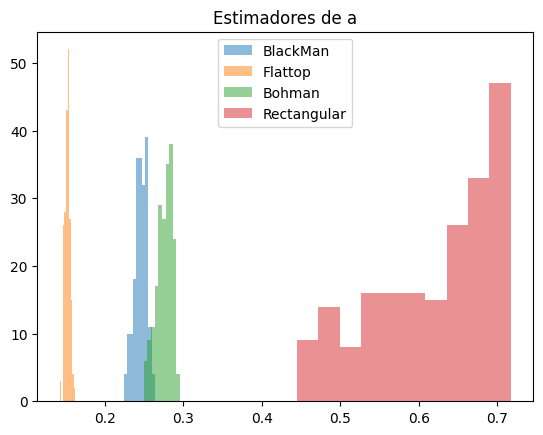

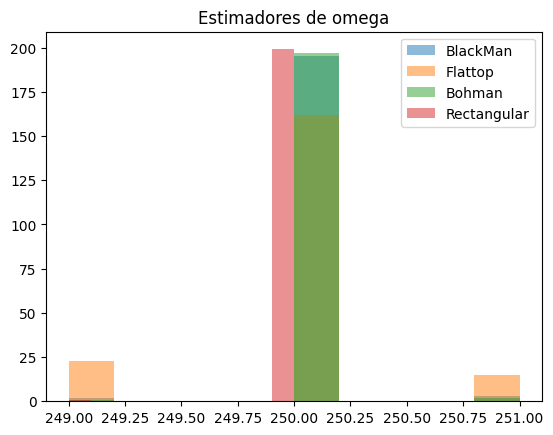

Blackman Harris: 
          ♦ Estimador a = 0.25
               Sesgo = 1.43
               Varianza = 0.03
          ♦ Estimador omega1 =  250.005
               Sesgo = 0.25
               Varianza = 0.02

Flattop: 
          ♦ Estimador a = 0.15
               Sesgo = 1.42
               Varianza = 0.01
          ♦ Estimador omega1 = 249.96
               Sesgo = 0.28
               Varianza = 0.19

Bohman: 
          ♦ Estimador a = 0.28
               Sesgo = 1.44
               Varianza = 0.04
          ♦ Estimador omega1 = 250.00
               Sesgo = 0.25
               Varianza = 0.01

Rectangular: 
          ♦ Estimador a = 0.62
               Sesgo = 1.52
               Varianza = 0.21
          ♦ Estimador omega1 = 250.00
               Sesgo = 0.25
               Varianza = 0.00


In [28]:
functs4(10)

Señal SNR =  3


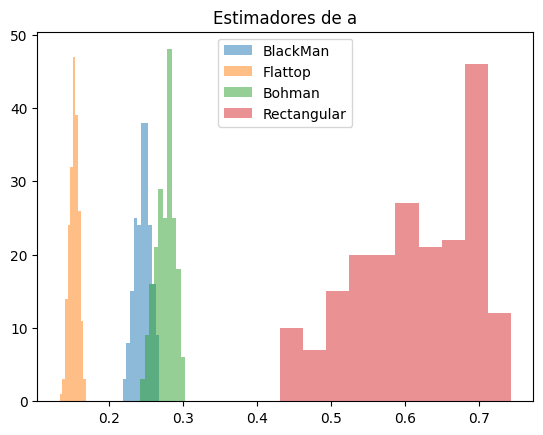

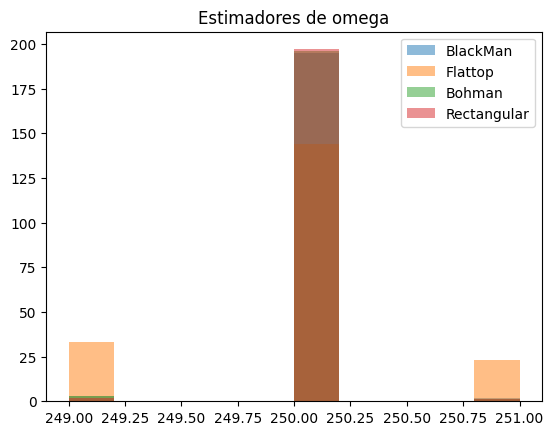

Blackman Harris: 
          ♦ Estimador a = 0.25
               Sesgo = 1.44
               Varianza = 0.04
          ♦ Estimador omega1 =  249.995
               Sesgo = 0.26
               Varianza = 0.02

Flattop: 
          ♦ Estimador a = 0.15
               Sesgo = 1.43
               Varianza = 0.01
          ♦ Estimador omega1 = 249.95
               Sesgo = 0.35
               Varianza = 0.28

Bohman: 
          ♦ Estimador a = 0.28
               Sesgo = 1.44
               Varianza = 0.05
          ♦ Estimador omega1 = 249.99
               Sesgo = 0.26
               Varianza = 0.02

Rectangular: 
          ♦ Estimador a = 0.61
               Sesgo = 1.51
               Varianza = 0.22
          ♦ Estimador omega1 = 250.00
               Sesgo = 0.26
               Varianza = 0.01


In [29]:
functs4(3)

Se puede observar que a través de este método de estimación, no se consigue una muy buena aproximación a la amplitud de la señal, ya que el sesgo que posee es elevado. Sin embargo, en tanto y en cuanto la varianza del mismo sea mínima, como es nuestro caso, es un problema que puede solucionarse facilmente mediante calibración, tratándose no más que de un corrimiento.

Por otro lado, el método de estimación sí parece ser correcto para la frecuencia $\Omega_{1}$, ya que tanto su sesgo como su varianza presentan valores muy próximos a cero.

Cabe destacar que, para la estimación de amplitud, en base a los resultados de sesgo y varianza obtenidos, las mejores ventanas a elegir son la Blackman-Harris y la Flattop. Además de los meros resultados, la Blackman-Harris posee un amplio pico en su espectro, asi como una buena compresion de los lobulos laterales, lo que la vuelve adecuada para analizar la amplitud de la señal, realzando este aspecto. Por otro lado, la Flattop posee un comportamiento similar, sin embargo, tiene la particularidad que su respuesta espectral cruza por cero, lo que provoca un pico mucho más amplio en el dominio de frecuencia, lo que provoca una visualización de la amplitud de la señal más fiel a la verdadera que con otras ventanas.

## Extra 1

### Zero Padding

Para un SNR = 10 dB

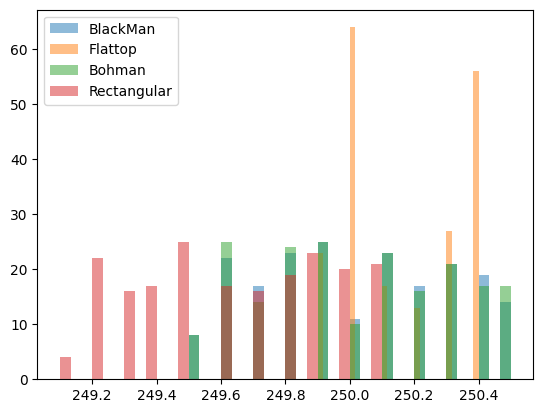

Blackman Harris: 
          ♦ Estimador omega1 = 250.01
               Sesgo = 0.03
               Varianza = 0.09

Flattop: 
          ♦ Estimador omega1 = 250.16
               Sesgo = 0.42
               Varianza = 0.04

Bohman: 
          ♦ Estimador omega1 = 250.01
               Sesgo = 0.03
               Varianza = 0.09

Rectangular: 
          ♦ Estimador omega1 = 249.65
               Sesgo = 0.37
               Varianza = 0.09


In [30]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import scipy

#%% Variables

fs = 1000
N = 1000
N2 = 10000

SNR = 10 #db

n_pruebas = 200

omega0 = fs/4 #mitad de banda

a1 = np.sqrt(2)

pot_ruido_analog = 10**(-SNR/10)

ver = -10 * np.log(pot_ruido_analog)

#%% Señal

ts=1/fs
df=fs/N
df2 = df/10

tt = np.linspace(0, (N-1)*ts, N).reshape((N,1))
tt = np.tile(tt, n_pruebas)

fr = np.random.uniform(-1/2, 1/2, size = (1,n_pruebas))

omega1 = omega0 + fr*(df)

## Argumento ##

arg = (omega1 * tt)

xx = a1*np.sin(2*np.pi*omega1*tt)

#%% Normalizo

xn = xx/np.std(xx)

nn =  np.random.normal(0, np.sqrt(pot_ruido_analog), N).reshape((N,1)) # señal de ruido de analógico

analog_sig = xn # señal analógica sin ruido

sr = analog_sig + nn # señal analógica de entrada al ADC (con ruido analógico)

ft_As = 1/N * np.fft.fft(sr, axis=0, n = N2)
ff = np.linspace(0, (N-1)*df, N) # grilla de sampleo frecuencial

#%% Ventanas

window1 = scipy.signal.windows.blackmanharris(N).reshape((N,1))
window2 = scipy.signal.windows.flattop(N).reshape((N,1))
window3 = scipy.signal.windows.bohman(N).reshape((N,1))

sw1 = window1 * sr
sw2 = window2 * sr
sw3 = window3 * sr

Sn1 =  1/N * abs(np.fft.fft(sw1, axis=0, n = N2))
Sn2 =  1/N * abs(np.fft.fft(sw2, axis=0, n = N2))
Sn3 =  1/N * abs(np.fft.fft(sw3, axis=0, n = N2))

#%% Estimador omega

k1 = np.argmax(Sn1[:N2//2:], axis = 0)
omega1_est = (k1) * df2

k2 = np.argmax(Sn2[:N2//2:], axis = 0)
omega2_est = (k2) * df2

k3 = np.argmax(Sn3[:N2//2:], axis = 0)
omega3_est = (k3) * df2

k4 = np.argmax(ft_As[:N2//2:], axis = 0)
omega4_est = (k4) * df2

plt.figure(5)

plt.hist(omega1_est, bins = 30, label = 'BlackMan', alpha =  0.5)
plt.hist(omega2_est, bins = 30, label = 'Flattop', alpha =  0.5)
plt.hist(omega3_est, bins = 30, label = 'Bohman', alpha =  0.5)
plt.hist(omega4_est, bins = 30, label = 'Rectangular', alpha =  0.5)
plt.legend()

plt.show()

#%% Sesgo y varianza    

sesgo1_o = np.mean(abs(omega1_est - omega1))
sesgo2_o = np.mean(abs(omega2_est - omega1))
sesgo3_o = np.mean(abs(omega3_est - omega1))
sesgo4_o = np.mean(abs(omega4_est - omega1))  
  
var1_o = np.var(omega1_est)
var2_o = np.var(omega2_est)
var3_o = np.var(omega3_est)
var4_o = np.var(omega4_est)

#%% Resultados

print("Blackman Harris: ")
print(f"          ♦ Estimador omega1 = {np.mean(abs(omega1_est)):.2f}")
print(f"               Sesgo = {sesgo1_o:.2f}")
print(f"               Varianza = {var1_o:.2f}") 
print("\nFlattop: ")
print(f"          ♦ Estimador omega1 = {np.mean(abs(omega2_est)):.2f}")
print(f"               Sesgo = {sesgo2_o:.2f}")
print(f"               Varianza = {var2_o:.2f}") 
print("\nBohman: ")
print(f"          ♦ Estimador omega1 = {np.mean(abs(omega3_est)):.2f}")
print(f"               Sesgo = {sesgo3_o:.2f}")
print(f"               Varianza = {var3_o:.2f}") 
print("\nRectangular: ")
print(f"          ♦ Estimador omega1 = {np.mean(abs(omega4_est)):.2f}")
print(f"               Sesgo = {sesgo4_o:.2f}")
print(f"               Varianza = {var4_o:.2f}") 

Se observa así que, con el uso del zero-padding, los resultados obtenidos del estimador $\Omega_{1}$ poseen una menor variación entra instancias del mismo experimento. Es decir, son menos propensos a verse modificados por factores aleatorios como el ruido, tanto su sesgo como su varianza.
Con el empleo de ventanas como la Flattop, tanto su varianza como su sesgo se ven mejorados en relación a su contrparte sin zero-padding. Sin embargo, con el resto de ventanas, no fueron tan contundentes los resultados como para afirmar una mejoría en ese aspecto, solamente el aumento de la confiabilidad del experimento.